# An application of Binomial transform

In this notebook we apply the [Binomial transform][on-oeis] to the Fibonacci numbers in order to substain the main [notebook][recurrence-notebook] where these numbers are studied in depth.

[on-oeis]:https://oeis.org/wiki/Binomial_transform
[recurrence-notebook]:http://nbviewer.jupyter.org/github/massimo-nocentini/PhD/blob/master/courses/paa/sympy-notebook/recurrences-unfolding.ipynb?flush_cache=true

In [3]:
import sympy
from sympy import *
from sympy.abc import x, n, z, t, k
    
init_printing() # for nice printing, a-la' TeX

In [4]:
%run "sums.py"

# duplicated code, put it into "sums.py"
def expand_sum_in_eq(eq_term):
    lhs, rhs = eq_term.lhs, eq_term.rhs
    return Eq(lhs, expand_Sum(rhs))

f = IndexedBase('f')
fibs = {f[i]:fibonacci(i) for i in range(100)}

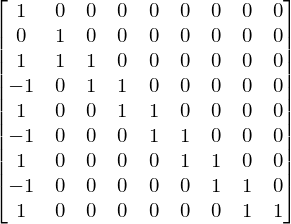

In [5]:
transforming_matrix = Matrix([
        [1,0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [1,1,1,0,0,0,0,0,0],
        [-1,0,1,1,0,0,0,0,0],
        [1,0,0,1,1,0,0,0,0],
        [-1,0,0,0,1,1,0,0,0],
        [1,0,0,0,0,1,1,0,0],
        [-1,0,0,0,0,0,1,1,0],
        [1,0,0,0,0,0,0,1,1]])

transforming_matrix

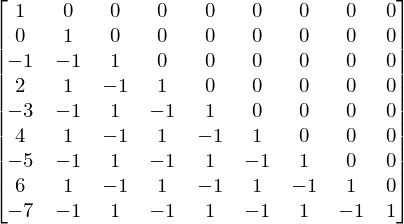

In [7]:
transforming_matrix**(-1)

In [8]:
def gf(t): return t + 1/(1+t)

gf(t).series(n=10)

In [9]:
def h(t): return t*(1+2*t+t**2)/(1+t+t**2)

(gf(t)*h(t)**2).series(n=10)

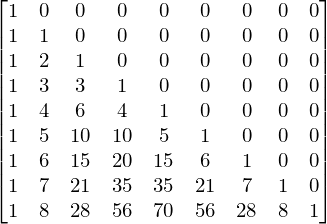

In [6]:
pascal_matrix = Matrix([
        [1,0,0,0,0,0,0,0,0],
        [1,1,0,0,0,0,0,0,0],
        [1,2,1,0,0,0,0,0,0],
        [1,3,3,1,0,0,0,0,0],
        [1,4,6,4,1,0,0,0,0],
        [1,5,10,10,5,1,0,0,0],
        [1,6,15,20,15,6,1,0,0],
        [1,7,21,35,35,21,7,1,0],
        [1,8,28,56,70,56,28,8,1]])
pascal_matrix

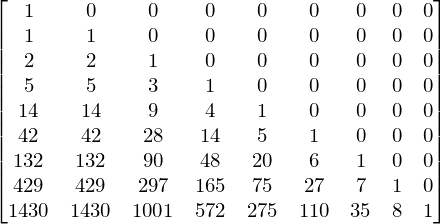

In [11]:
catalan_matrix = Matrix([
        [1,0,0,0,0,0,0,0,0],
        [1,1,0,0,0,0,0,0,0],
        [2,2,1,0,0,0,0,0,0],
        [5,5,3,1,0,0,0,0,0],
        [14,14,9,4,1,0,0,0,0],
        [42,42,28,14,5,1,0,0,0],
        [132,132,90,48,20,6,1,0,0],
        [429,429,297,165,75,27,7,1,0],
        [1430,1430,1001,572,275,110,35,8,1]])
catalan_matrix

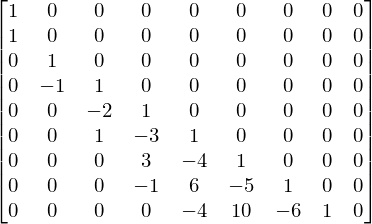

In [12]:
catalan_inverse_matrix = Matrix([
        [1,0,0,0,0,0,0,0,0],
        [1,0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [0,-1,1,0,0,0,0,0,0],
        [0,0,-2,1,0,0,0,0,0],
        [0,0,1,-3,1,0,0,0,0],
        [0,0,0,3,-4,1,0,0,0],
        [0,0,0,-1,6,-5,1,0,0],
        [0,0,0,0,-4,10,-6,1,0]])
catalan_inverse_matrix

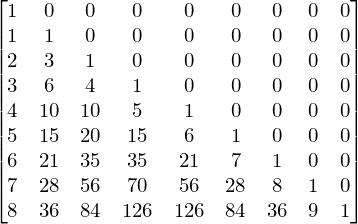

In [13]:
odd_transformed_matrix = pascal_matrix * transforming_matrix
odd_transformed_matrix

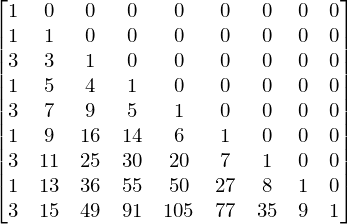

In [14]:
transforming_matrix * pascal_matrix

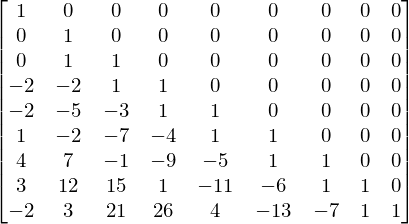

In [15]:
(catalan_matrix**(-1) )*odd_transformed_matrix

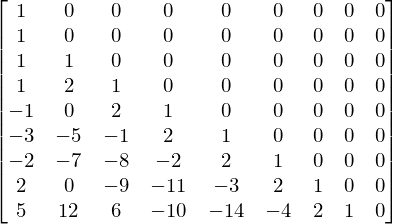

In [16]:
catalan_inverse_matrix * odd_transformed_matrix

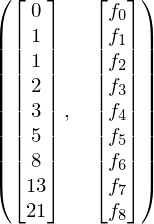

In [7]:
fib_matrix = Matrix([fibonacci(i) for i in range(9)])
fib_matrix_sym = Matrix([f[i] for i in range(9)])

fib_matrix, fib_matrix_sym

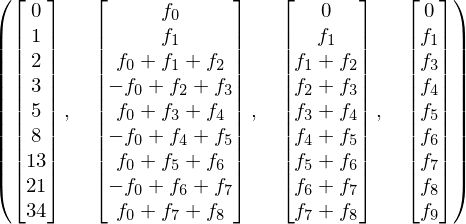

In [8]:
a = Wild('a')
std_prod = transforming_matrix * fib_matrix
sym_prod = transforming_matrix * fib_matrix_sym

std_prod, sym_prod, sym_prod.subs({f[0]:0}), sym_prod.subs({f[0]:0}).replace(f[a]+f[a+1],f[a+2])

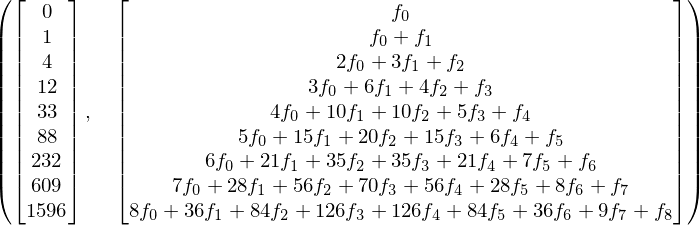

In [9]:
rhs=pascal_matrix * transforming_matrix * fib_matrix
rhs_sym = pascal_matrix * sym_prod
rhs, rhs_sym

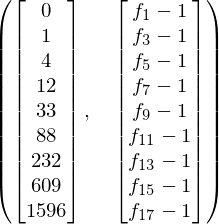

In [10]:
a_range = range(1,18,2)
lhs=Matrix([fibonacci(i) for i in a_range]) - Matrix([1 for i in range(9)])
lhs_sym=Matrix([f[i] for i in a_range]) - Matrix([1 for i in range(9)])
lhs, lhs_sym

In [11]:
Eq(lhs,rhs)

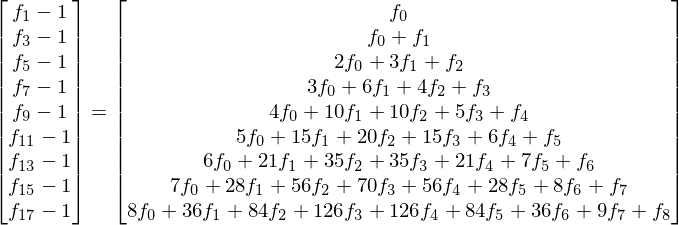

In [12]:
eq_sym = Eq(lhs_sym, rhs_sym)
eq_sym

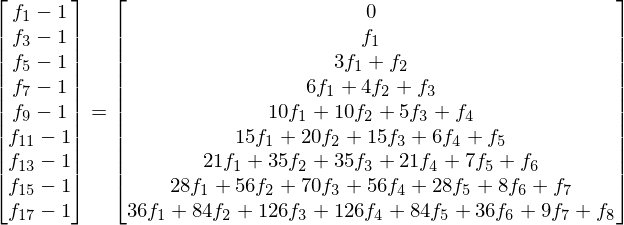

In [13]:
fib0_term = f[0]
eq_sym.subs(fib0_term, fibs[fib0_term])

Since coefficient in the triangle on the rhs are a part of Pascal triangle, namely [A104712][oeis], the following is a generalization:
$$
    f_{2n+1} - 1 = \sum_{k=1}^{n}{{{n+1}\choose{k+1}}f_{k}}
$$

[oeis]:http://oeis.org/A104712

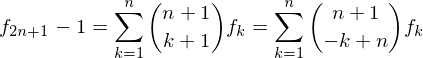

In [48]:
gen_odd_fibs = Eq(f[2*n+1]-1, Sum(binomial(n+1, k+1)*f[k], (k,1,n)))
Eq(gen_odd_fibs, Sum(binomial(n+1, n-k)*f[k], (k,1,n)))

In [58]:
expand_sum_in_eq(gen_odd_fibs.subs(n, 8))

In [26]:
eq_sym.subs(fibs)

In [27]:
eq_17 = Eq(f[17],f[-1] + rhs_sym[-1])
eq_18_shift = Eq(f[n], f[n-18]+8*f[n-17]+36*f[n-16]+84*f[n-15]+126*f[n-14]+126*f[n-13]+84*f[n-12]+36*f[n-11]+9*f[n-10]+f[n-9])
eq_17, eq_18_shift

In [28]:
[eq_18_shift.subs(n,i).lhs.subs(fibs) - eq_18_shift.subs(n,i).rhs.subs(fibs) for i in range(18,32)]

again, fibonacci numbers, [A000045][oeis].

[oeis]:http://oeis.org/A000045

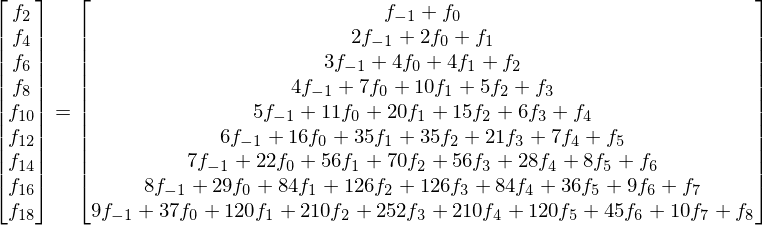

In [14]:
from itertools import accumulate

to_accumulate = rhs_sym + ones(9,1)*f[-1]
even_rhs = Matrix(list(accumulate(to_accumulate, lambda folded, current_row: Add(folded, current_row) )))

even_lhs = Matrix([f[i] for i in range(2,19,2)])

even_fibs_matrix_eq = Eq(even_lhs, even_rhs)
even_fibs_matrix_eq

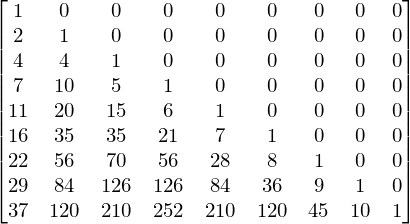

In [30]:
even_transformed_matrix = Matrix([
        [1,0,0,0,0,0,0,0,0],
        [2,1,0,0,0,0,0,0,0],
        [4,4,1,0,0,0,0,0,0],
        [7,10,5,1,0,0,0,0,0],
        [11,20,15,6,1,0,0,0,0],
        [16,35,35,21,7,1,0,0,0],
        [22,56,70,56,28,8,1,0,0],
        [29,84,126,126,84,36,9,1,0],
        [37,120,210,252,210,120,45,10,1]])
even_transformed_matrix

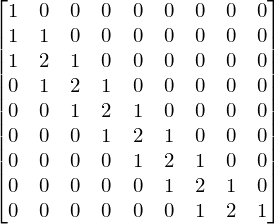

In [31]:
even_transforming_matrix = (pascal_matrix**(-1))*even_transformed_matrix
even_transforming_matrix

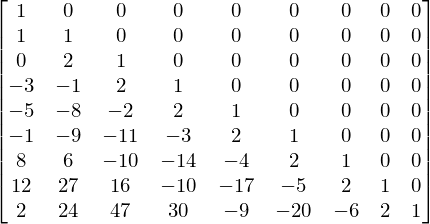

In [32]:
(catalan_matrix**(-1) )*even_transformed_matrix

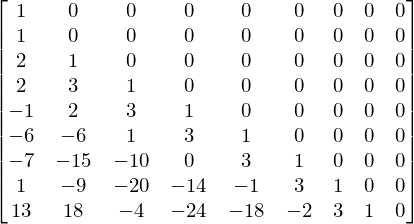

In [33]:
catalan_inverse_matrix * even_transformed_matrix

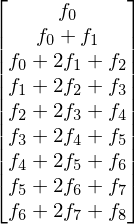

In [34]:
even_transforming_matrix * fib_matrix_sym

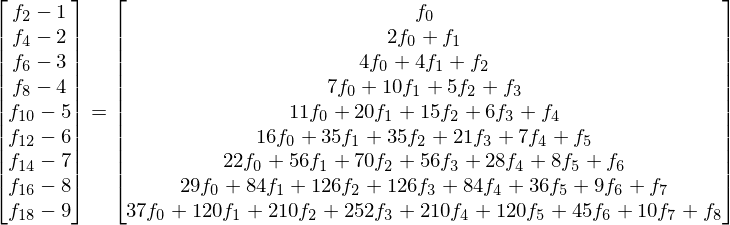

In [47]:
even_vector_eq_sym = Eq(even_lhs - Matrix(list(range(1,10))), 
                        pascal_matrix * even_transforming_matrix * fib_matrix_sym)
even_vector_eq_sym

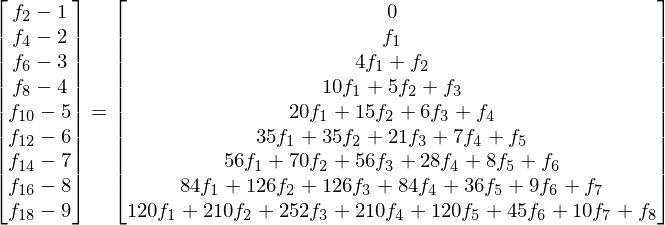

In [49]:
even_vector_eq_sym.subs(fib0_term, fibs[fib0_term])

Since coefficient in the triangle on the rhs are a part of Pascal triangle, namely [A104713][oeis], the following is a generalization:
$$
    f_{2n} - n = \sum_{k=1}^{n-1}{{{n+1}\choose{k+2}}f_{k}}
$$

[oeis]:http://oeis.org/A104713

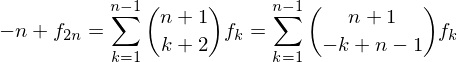

In [51]:
gen_even_fibs = Eq(f[2*n]-n, Sum(binomial(n+1, k+2)*f[k], (k,1,n-1)))
Eq(gen_even_fibs, Sum(binomial(n+1, n-k-1)*f[k], (k,1,n-1)))

In [57]:
expand_sum_in_eq(gen_even_fibs.subs(n, 9))

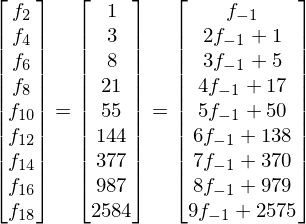

In [36]:
even_fibs_matrix_eq_minus1_appear = even_fibs_matrix_eq.subs(fibs)
Eq(even_fibs_matrix_eq.lhs, even_fibs_matrix_eq_minus1_appear, evaluate=False)

summands on the rhs form a known sequence [A054452][oeis].

[oeis]:http://oeis.org/A054452

In [37]:
list(accumulate([fibonacci(2*i+1)-1 for i in range(21)]))

In [38]:
def n_gf(t): return 1/(1-t)**2

n_gf(t).series(n=20)

In [39]:
def odd_integers_gf(t): return ((n_gf(t)+n_gf(-t))/2).simplify()

odd_integers_gf(t).series(n=20)

In [40]:
# here is the error: we should use the generating function of F(2n+1) instead of F(n) as done here!
def fib_gf(t): return t/(1-t-t**2)

fib_gf(odd_integers_gf(t)).series(n=20)

In [41]:
def even_fibs_gf(t): return n_gf(t) + fib_gf(t)/(1-t)

even_fibs_gf(t).series(n=10)

In [42]:
even_fibs_matrix_eq_minus1_appear.subs(f[-1],1)

In [43]:
eq_17 = Eq(f[n], 8*f[n-17]+29*f[n-16]+84*f[n-15]+126*f[n-14]+126*f[n-13]+84*f[n-12]+36*f[n-11]+9*f[n-10]+f[n-9])
eq_17

In [44]:
[eq_17.subs(n,i).lhs.subs(fibs) - eq_17.subs(n,i).rhs.subs(fibs) for i in range(17,31)]

which is known as [A022091][oeis].

[oeis]:http://oeis.org/A022091